In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the data
df = pd.read_csv("agaricus-lepiota.csv")  # Change this to the location of your CSV file



In [9]:
# Initialize the label encoder
labelencoder = LabelEncoder()

# Encode all columns
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

df.drop('edibility', axis=1, inplace=True)




df.head()


,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


c:\Users\eriks\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\eriks\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\eriks\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\eriks\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

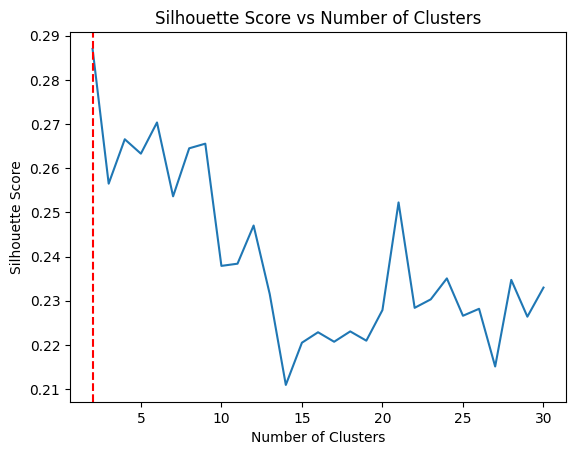

In [17]:
# Prepare an empty list to store the silhouette scores
silhouette_scores = []

# Calculate silhouette scores for different numbers of clusters
for n_cluster in range(2, 31):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters based on maximum silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because range starts from 2

# Plot silhouette scores
plt.plot(range(2, 31), silhouette_scores)
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

c:\Users\eriks\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


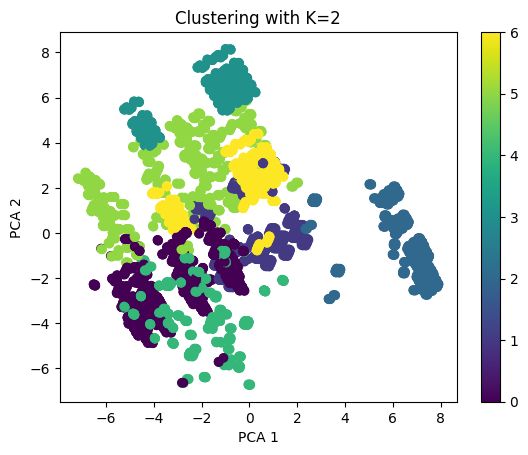

In [18]:
# Apply k-means with optimal number of clusters
kmeans = KMeans(7)
clusters = kmeans.fit_predict(df)

# Apply PCA and reduce dimensionality
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Scatter plot
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f"Clustering with K={optimal_k}")
plt.colorbar()
plt.show()